<a href="https://colab.research.google.com/github/hyunku/kaggle-home-credit-default/blob/main/homecredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 라이브러리와 app 데이터 세트 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc,os,sys
import random

from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', 30)

# 1. 데이터 불러오기

데이터는 여기에서 다운로드 받으실 수 있습니다!

https://www.kaggle.com/competitions/home-credit-default-risk/data

In [ ]:
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
default_dir = "/content/gdrive/MyDrive/PythonProjects/datafiles/home-credit-default-risk"

def get_dataset():
    prev_dtype = {
        'SK_ID_PREV':np.uint32, 'SK_ID_CURR':np.uint32, 'HOUR_APPR_PROCESS_START':np.int32, 'NFLAG_LAST_APPL_IN_DAY':np.int32,
        'DAYS_DECISION':np.int32, 'SELLERPLACE_AREA':np.int32, 'AMT_ANNUITY':np.float32, 'AMT_APPLICATION':np.float32,
        'AMT_CREDIT':np.float32, 'AMT_DOWN_PAYMENT':np.float32, 'AMT_GOODS_PRICE':np.float32, 'RATE_DOWN_PAYMENT':np.float32,
        'RATE_INTEREST_PRIMARY':np.float32, 'RATE_INTEREST_PRIVILEGED':np.float32, 'CNT_PAYMENT':np.float32,
        'DAYS_FIRST_DRAWING':np.float32, 'DAYS_FIRST_DUE':np.float32, 'DAYS_LAST_DUE_1ST_VERSION':np.float32,
        'DAYS_LAST_DUE':np.float32, 'DAYS_TERMINATION':np.float32, 'NFLAG_INSURED_ON_APPROVAL':np.float32
    }
    
    bureau_dtype = {
        'SK_ID_CURR':np.uint32, 'SK_ID_BUREAU':np.uint32, 'DAYS_CREDIT':np.int32,'CREDIT_DAY_OVERDUE':np.int32,
        'CNT_CREDIT_PROLONG':np.int32, 'DAYS_CREDIT_UPDATE':np.int32, 'DAYS_CREDIT_ENDDATE':np.float32,
        'DAYS_ENDDATE_FACT':np.float32, 'AMT_CREDIT_MAX_OVERDUE':np.float32, 'AMT_CREDIT_SUM':np.float32,
        'AMT_CREDIT_SUM_DEBT':np.float32, 'AMT_CREDIT_SUM_LIMIT':np.float32, 'AMT_CREDIT_SUM_OVERDUE':np.float32,
        'AMT_ANNUITY':np.float32
    }
    
    bureau_bal_dtype = {
        'SK_ID_BUREAU':np.int32, 'MONTHS_BALANCE':np.int32,
    }
    
    pos_dtype = {
        'SK_ID_PREV':np.uint32, 'SK_ID_CURR':np.uint32, 'MONTHS_BALANCE':np.int32, 'SK_DPD':np.int32,
        'SK_DPD_DEF':np.int32, 'CNT_INSTALMENT':np.float32,'CNT_INSTALMENT_FUTURE':np.float32
    }
    
    install_dtype = {
        'SK_ID_PREV':np.uint32, 'SK_ID_CURR':np.uint32, 'NUM_INSTALMENT_NUMBER':np.int32, 'NUM_INSTALMENT_VERSION':np.float32,
        'DAYS_INSTALMENT':np.float32, 'DAYS_ENTRY_PAYMENT':np.float32, 'AMT_INSTALMENT':np.float32, 'AMT_PAYMENT':np.float32
    }
    
    card_dtype = {
        'SK_ID_PREV':np.uint32, 'SK_ID_CURR':np.uint32, 'MONTHS_BALANCE':np.int16,
        'AMT_CREDIT_LIMIT_ACTUAL':np.int32, 'CNT_DRAWINGS_CURRENT':np.int32, 'SK_DPD':np.int32,'SK_DPD_DEF':np.int32,
        'AMT_BALANCE':np.float32, 'AMT_DRAWINGS_ATM_CURRENT':np.float32, 'AMT_DRAWINGS_CURRENT':np.float32,
        'AMT_DRAWINGS_OTHER_CURRENT':np.float32, 'AMT_DRAWINGS_POS_CURRENT':np.float32, 'AMT_INST_MIN_REGULARITY':np.float32,
        'AMT_PAYMENT_CURRENT':np.float32, 'AMT_PAYMENT_TOTAL_CURRENT':np.float32, 'AMT_RECEIVABLE_PRINCIPAL':np.float32,
        'AMT_RECIVABLE':np.float32, 'AMT_TOTAL_RECEIVABLE':np.float32, 'CNT_DRAWINGS_ATM_CURRENT':np.float32,
        'CNT_DRAWINGS_OTHER_CURRENT':np.float32, 'CNT_DRAWINGS_POS_CURRENT':np.float32, 'CNT_INSTALMENT_MATURE_CUM':np.float32
    }
    
    app_train = pd.read_csv(os.path.join(default_dir, 'application_train.csv'))
    app_test = pd.read_csv(os.path.join(default_dir, 'application_test.csv'))
    apps = pd.concat([app_train, app_test])
    prev = pd.read_csv(os.path.join(default_dir, 'previous_application.csv'), dtype=prev_dtype)
    bureau = pd.read_csv(os.path.join(default_dir, 'bureau.csv'), dtype=bureau_dtype)
    bureau_bal = pd.read_csv(os.path.join(default_dir, 'bureau_balance.csv'), dtype=bureau_bal_dtype)
    pos_bal = pd.read_csv(os.path.join(default_dir, 'POS_CASH_balance.csv'), dtype=pos_dtype)
    install = pd.read_csv(os.path.join(default_dir, 'installments_payments.csv'), dtype=install_dtype)
    card_bal = pd.read_csv(os.path.join(default_dir, 'credit_card_balance.csv'), dtype=card_dtype)

    return apps, prev, bureau, bureau_bal, pos_bal, install, card_bal, app_train, app_test


In [ ]:
# 데이터 로드
apps, prev, bureau, bureau_bal, pos_bal, install, card_bal, app_train, app_test = get_dataset()

# 2. 데이터 기본 정보 확인

In [ ]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# train 셋에는 타겟 데이터 포함, test셋에는 타겟 데이터 미포함 -> 컬럼이 test에 한개 부족.
print(f'train set shape: {app_train.shape}   test set shape: {app_test.shape}')

train set shape: (307511, 122)   test set shape: (48744, 121)


In [ ]:
# 결측치 살펴보기
app_train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [ ]:
# 타겟 데이터 : app_train['TARGET']
# 타겟 데이터 개수 살펴보기
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
# 타겟 데이터 비율 보기 -> 0은 대출 상환 가능, 1은 대출 상환 불가능
app_train['TARGET'].value_counts() / app_train.shape[0]

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

# 3. EDA

#### 연속형 숫자 feature들에 대해서 TARGET값이 각각 0과 1일때의 Histogram 시각화
* violinplot과 distplot으로 숫자형 feature들에 대해 TARGET값 별 분포도 비교 시각화

In [ ]:
# 연속형 속성들 리스트
num_columns = app_train.dtypes[app_train.dtypes != 'object']
print(num_columns)

SK_ID_CURR                        int64
TARGET                            int64
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64


In [ ]:
def show_num_hist(df, columns):
    cond_1 = (df['TARGET'] == 1)
    cond_0 = (df['TARGET'] == 0)
    
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), squeeze=False)
        sns.violinplot(x='TARGET', y=column, data=df, ax=axs[0][0] )
        sns.distplot(df[cond_0][column], ax=axs[0][1], label='0', color='blue')
        sns.distplot(df[cond_1][column], ax=axs[0][1], label='1', color='red')

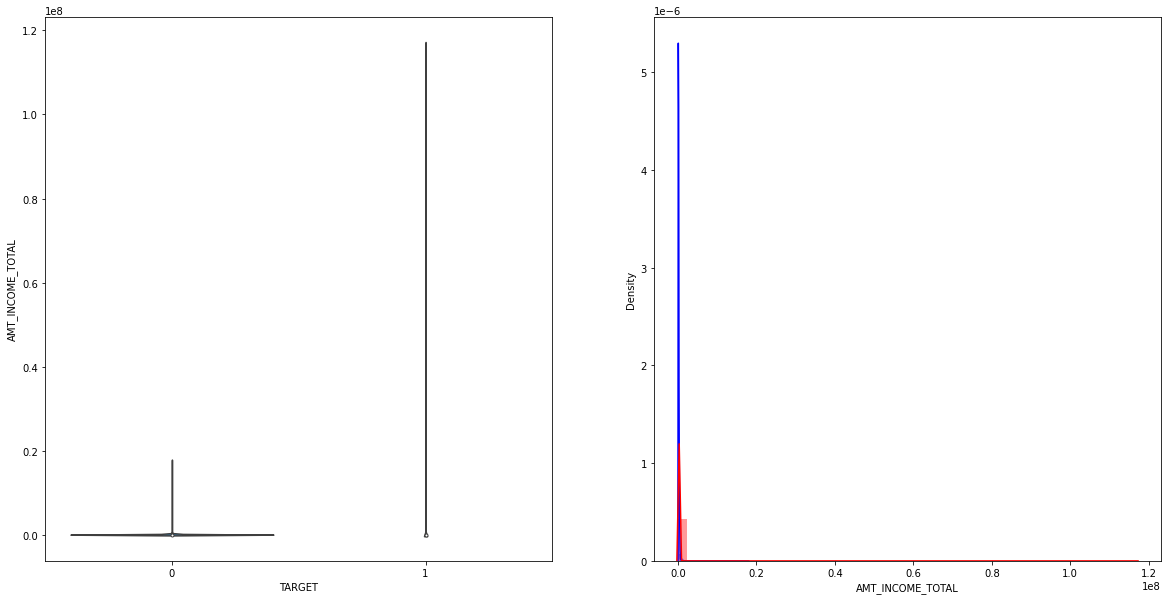

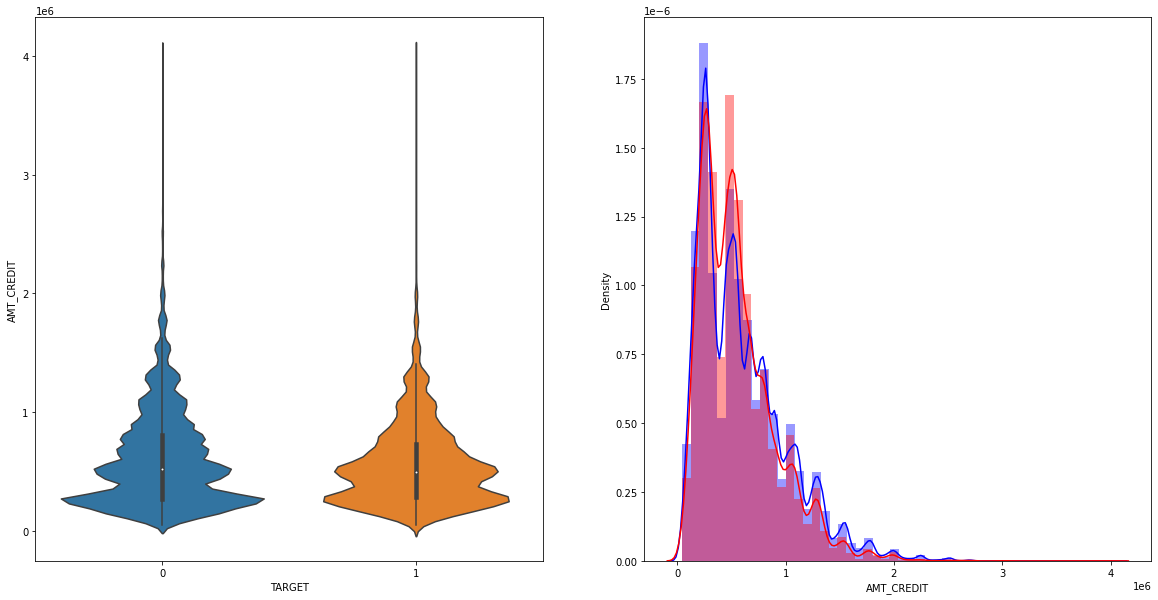

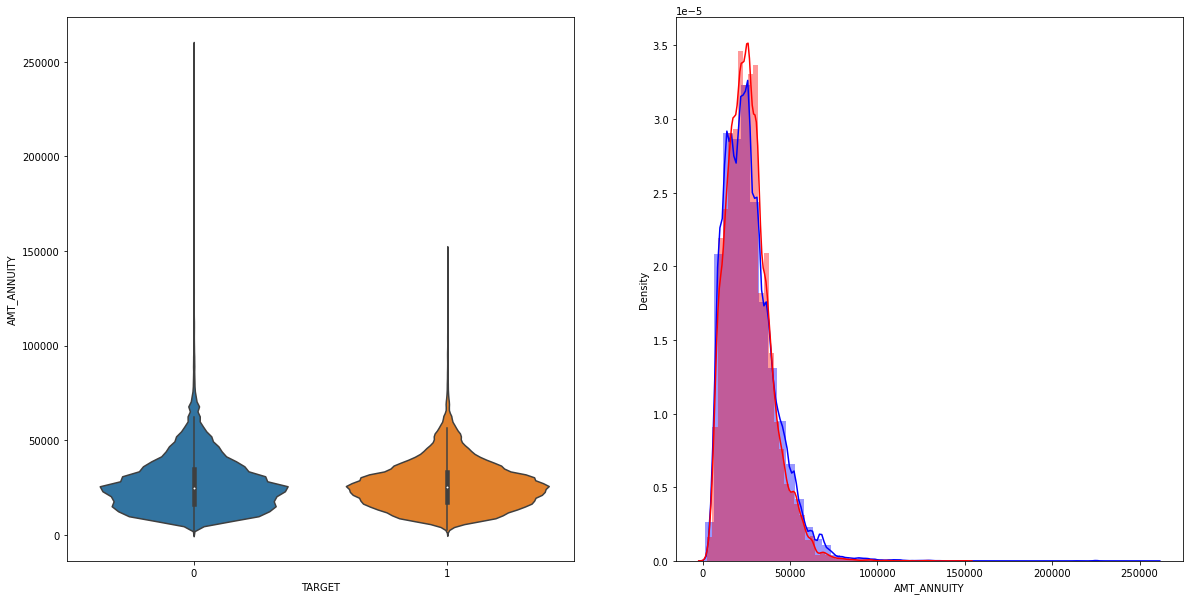

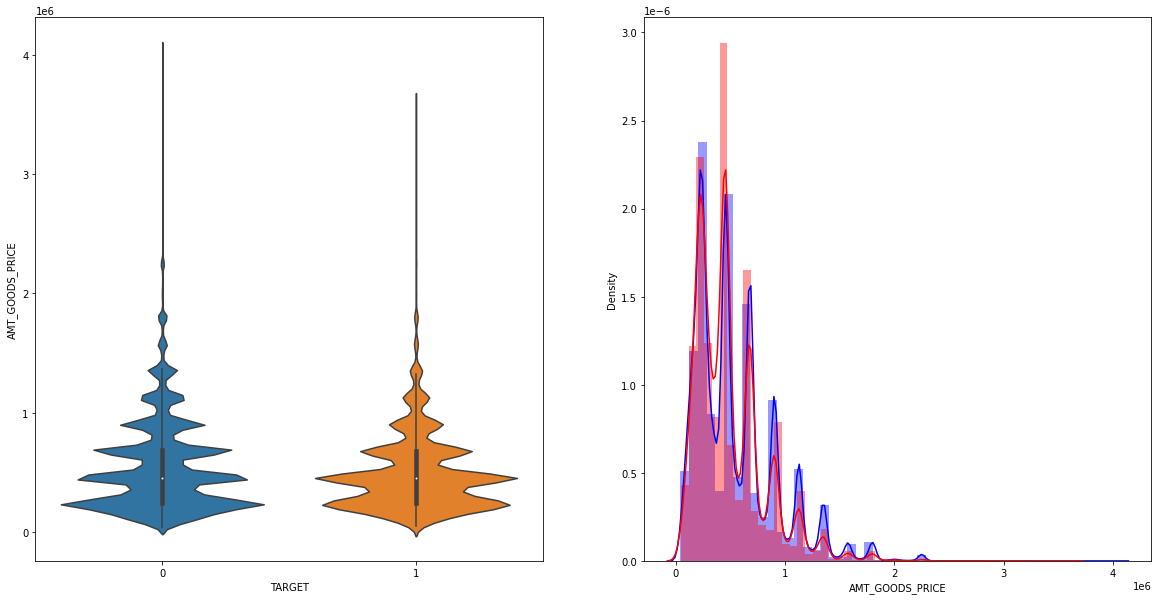

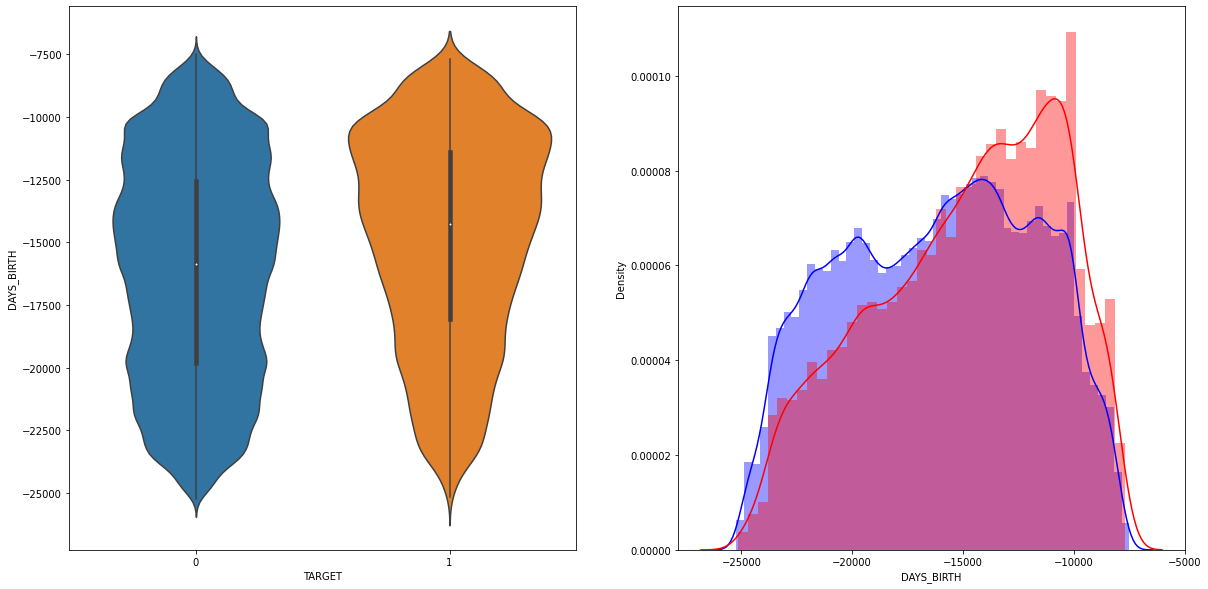

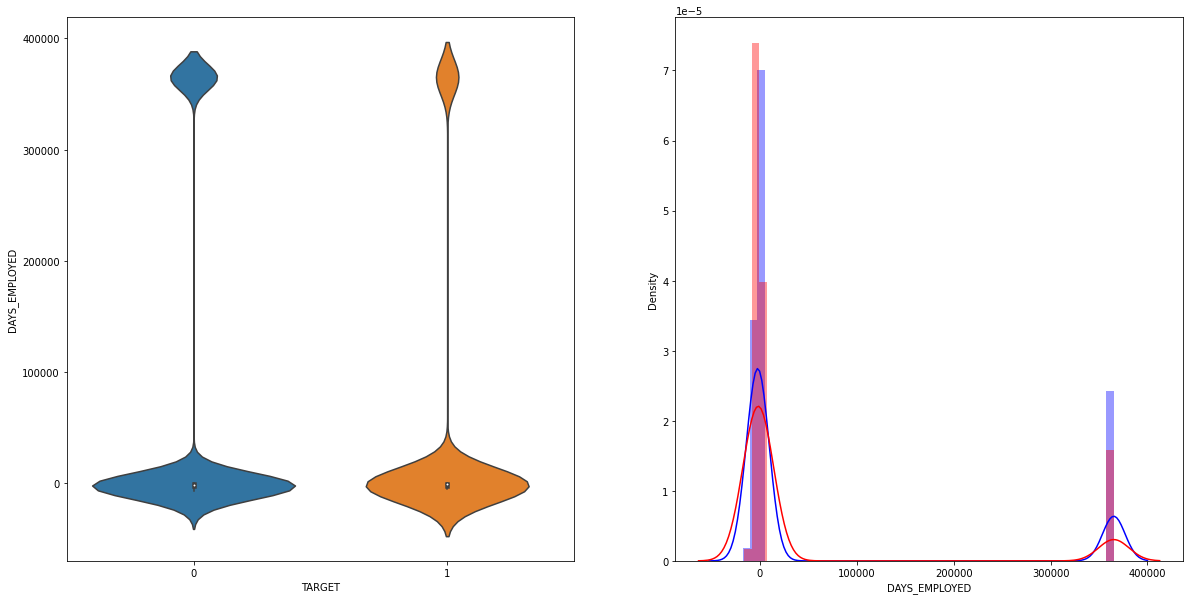

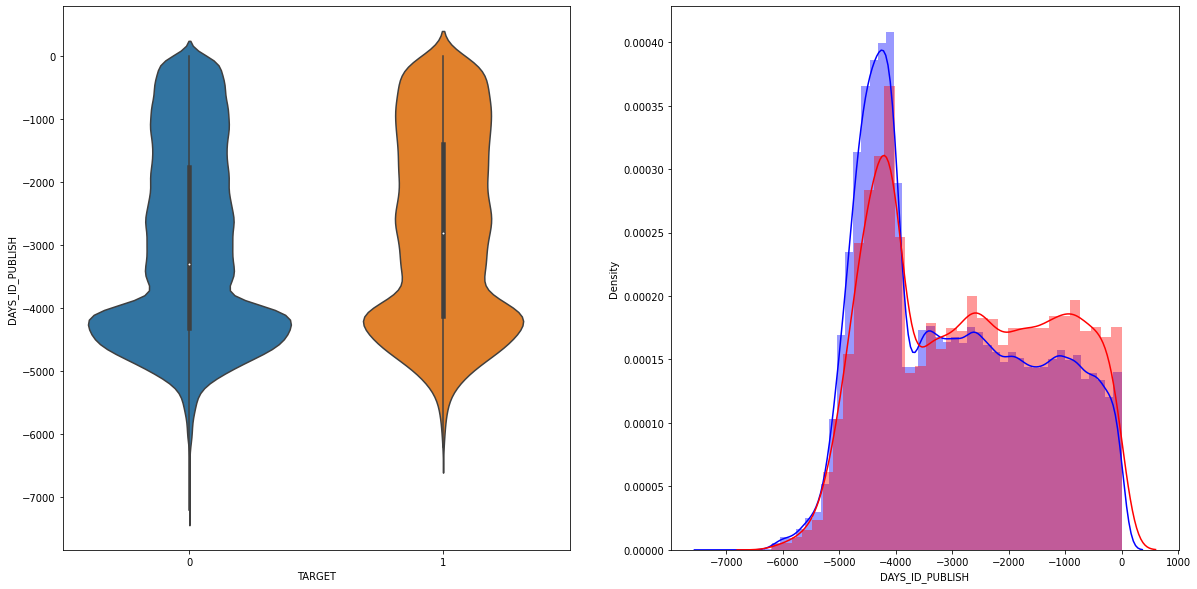

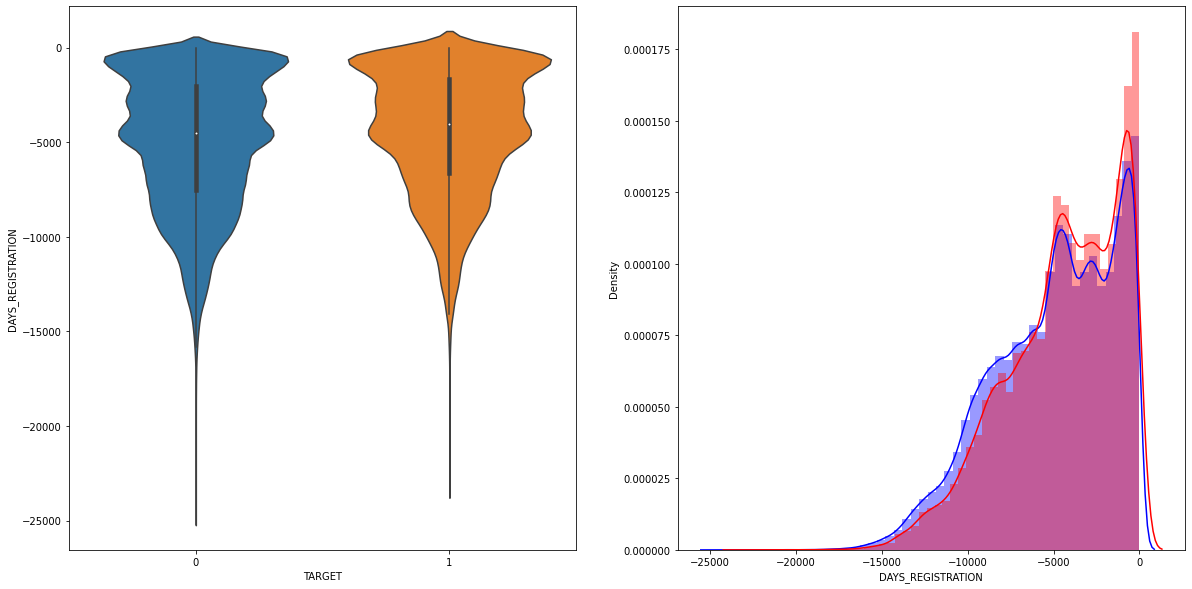

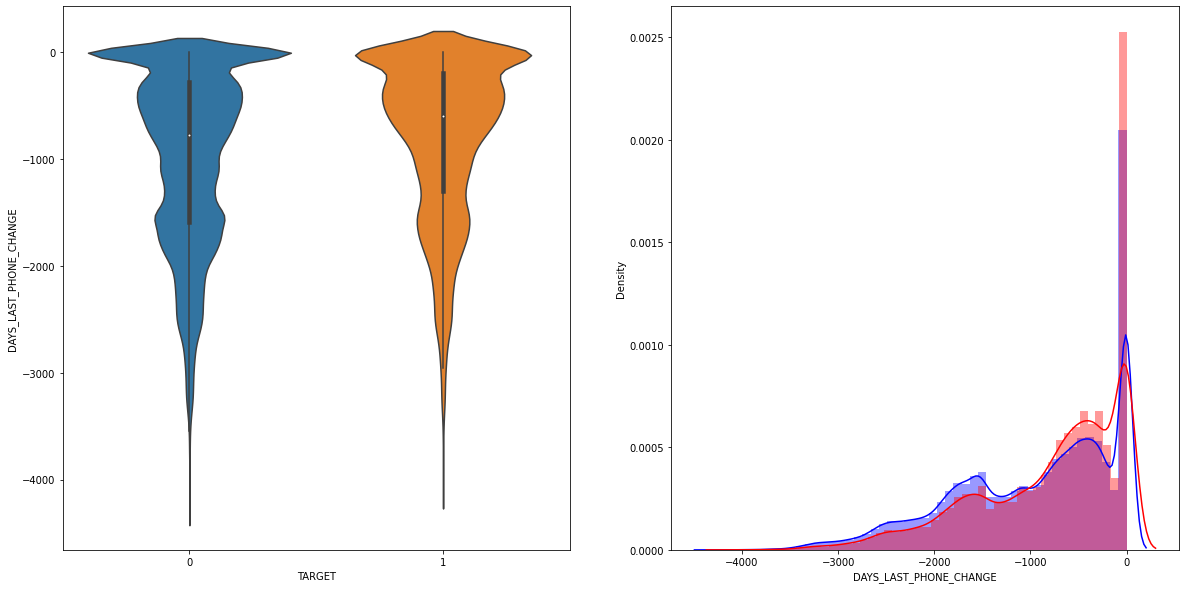

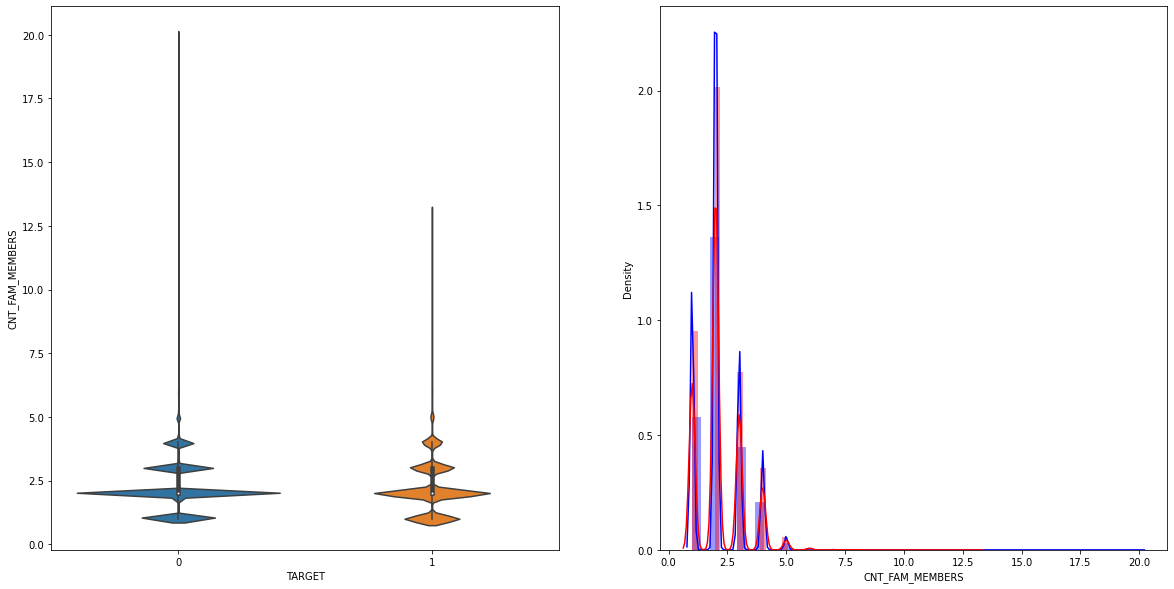

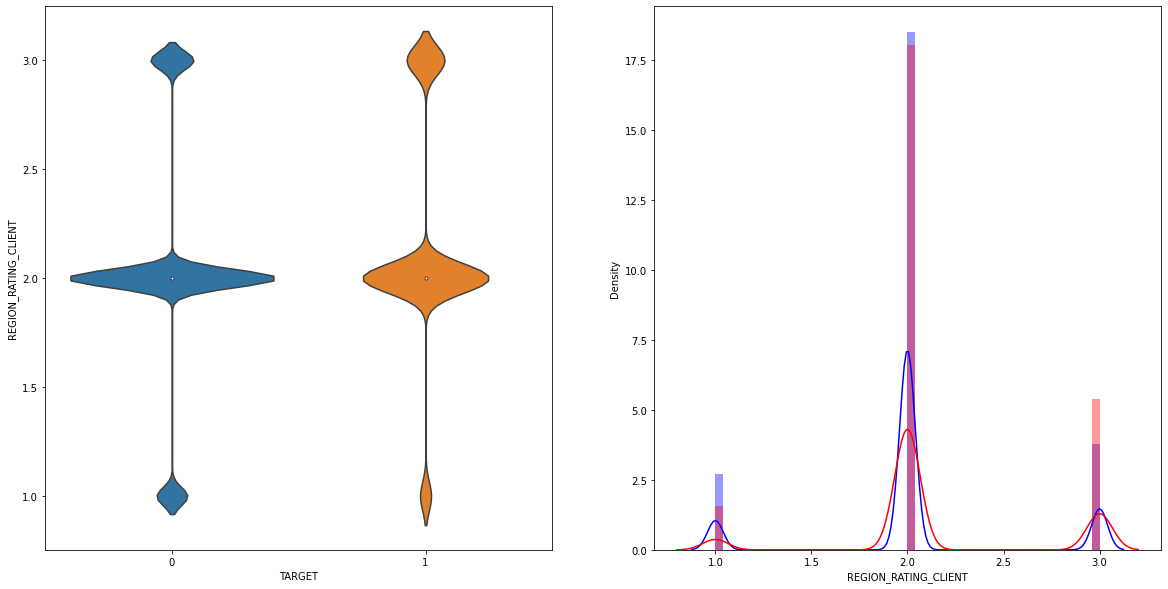

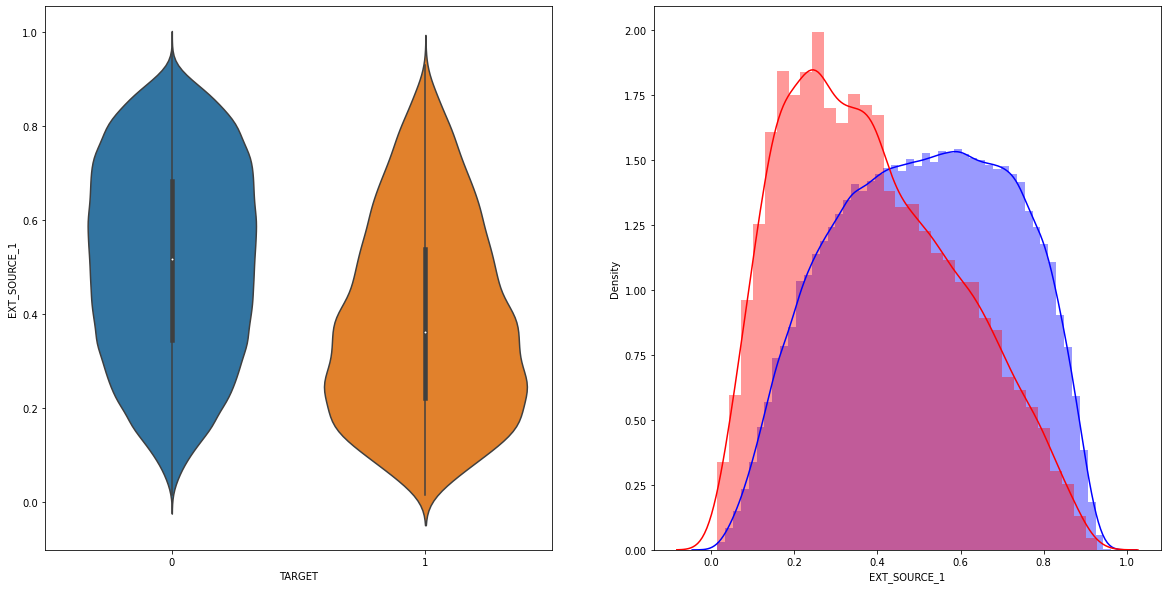

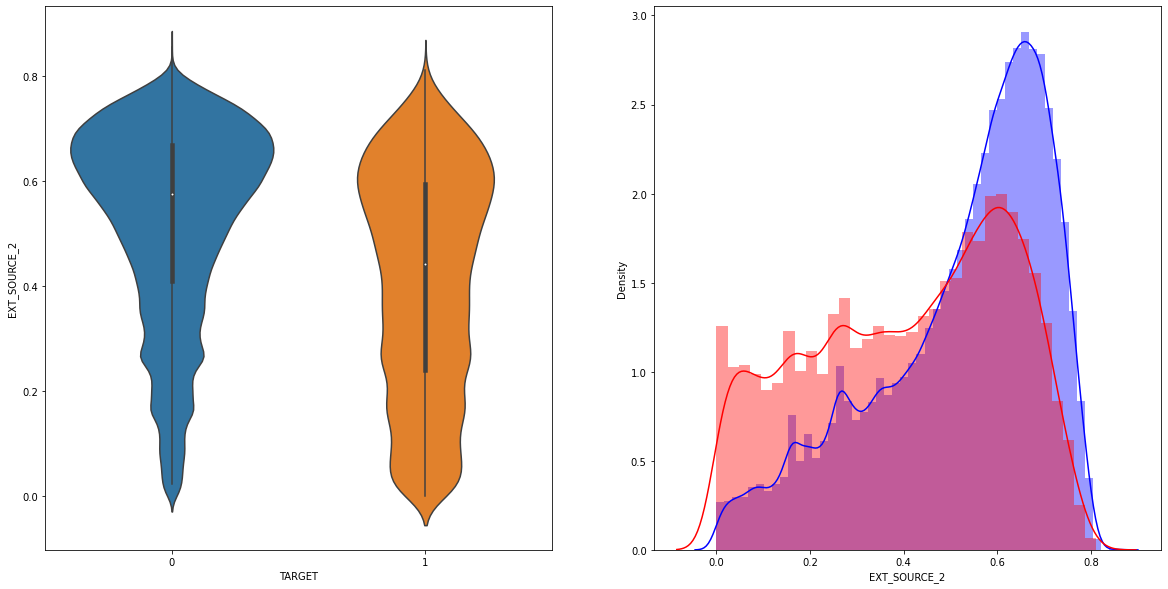

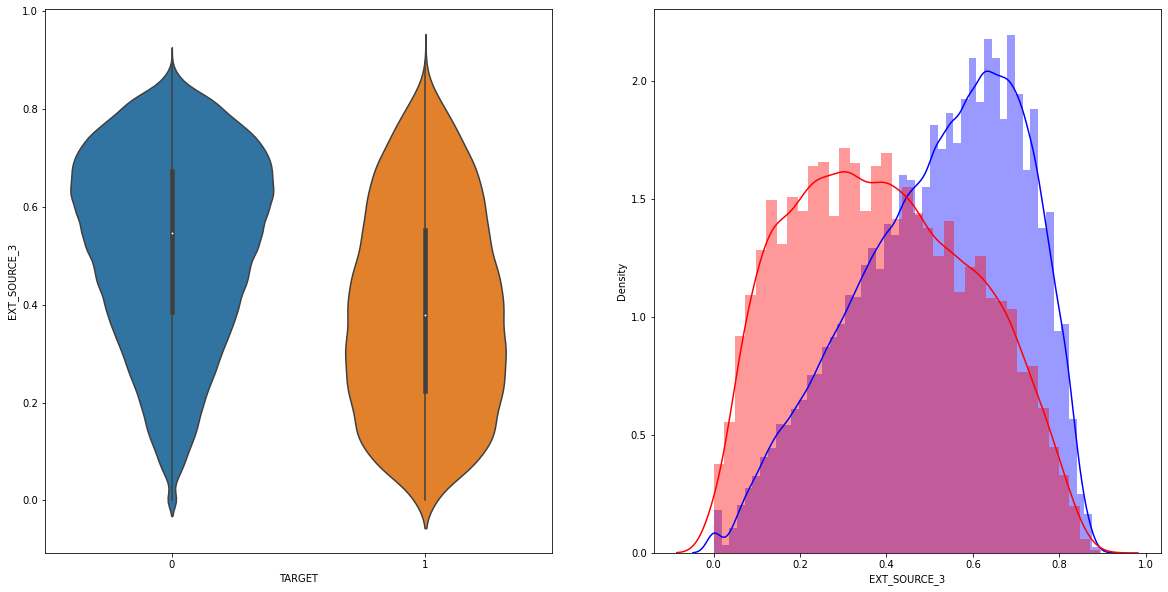

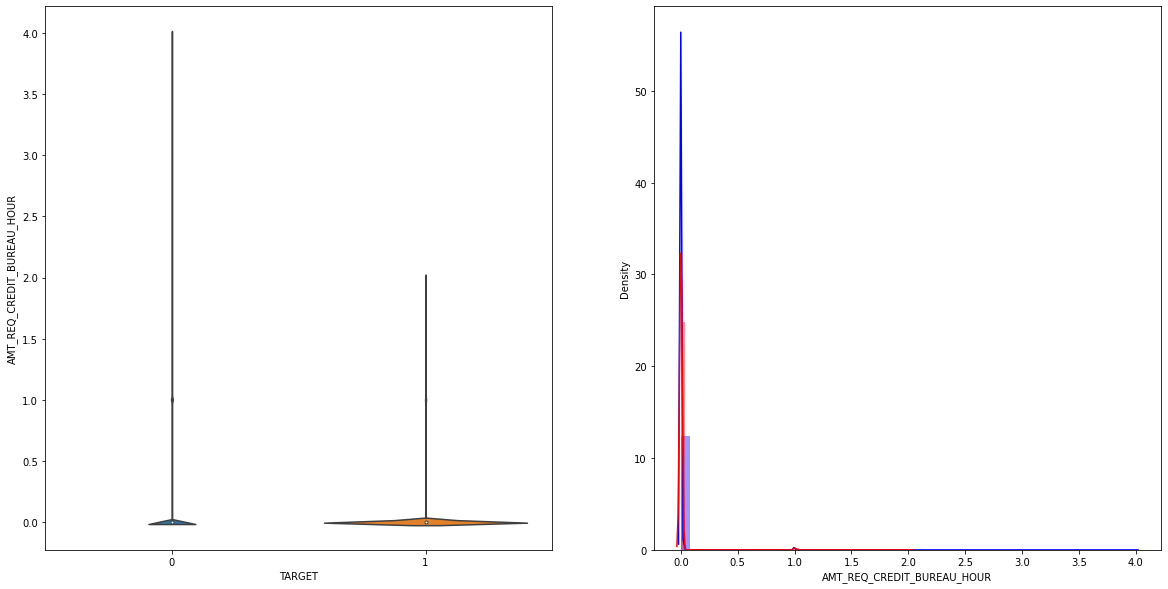

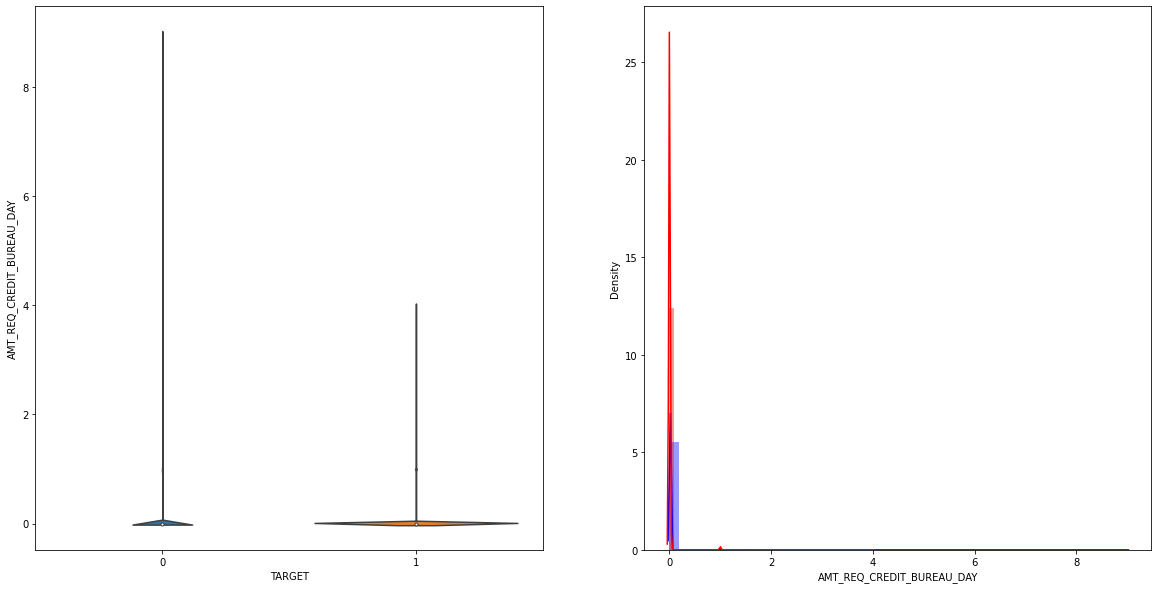

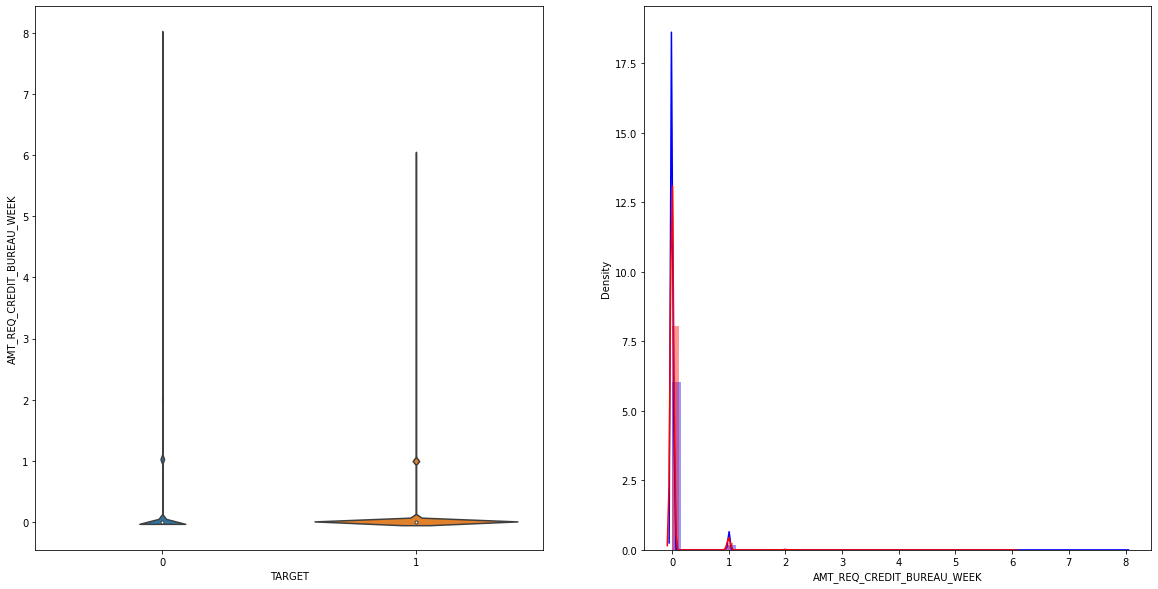

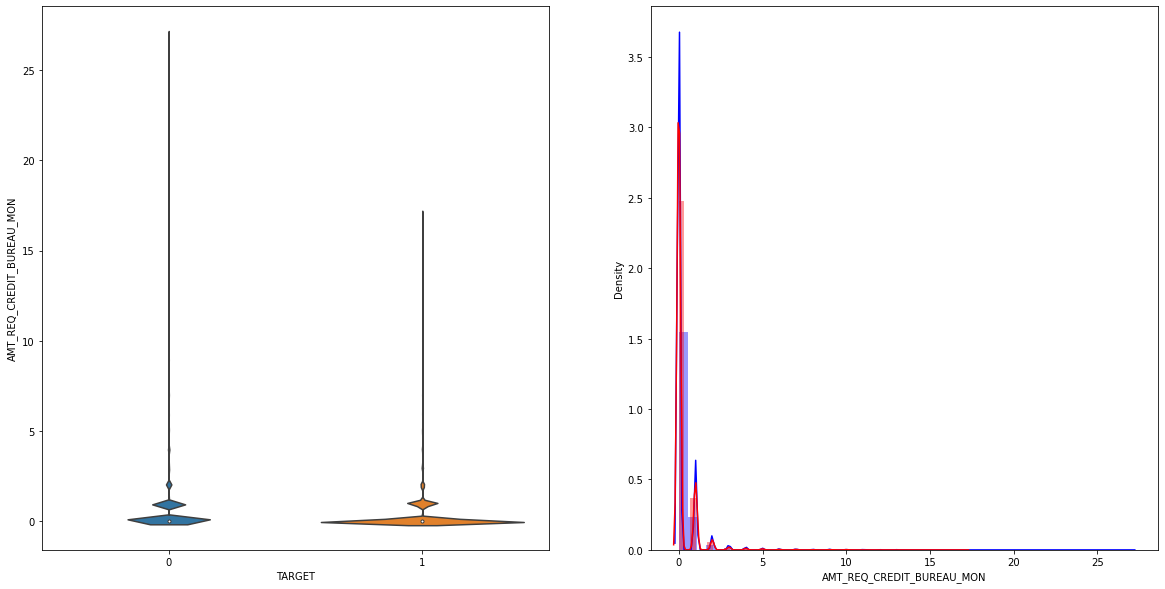

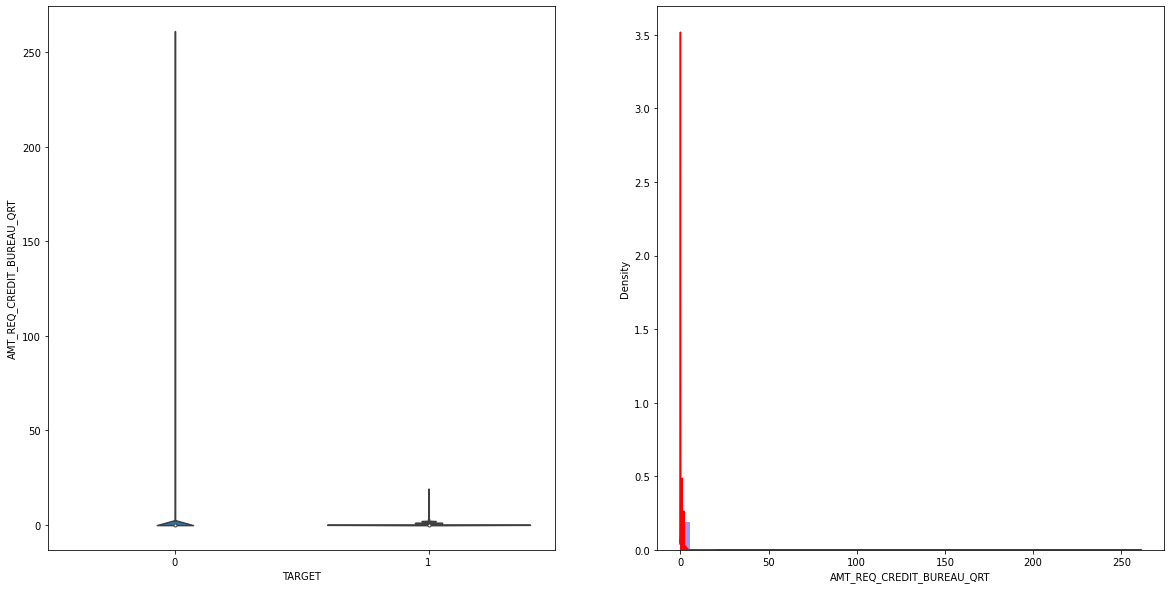

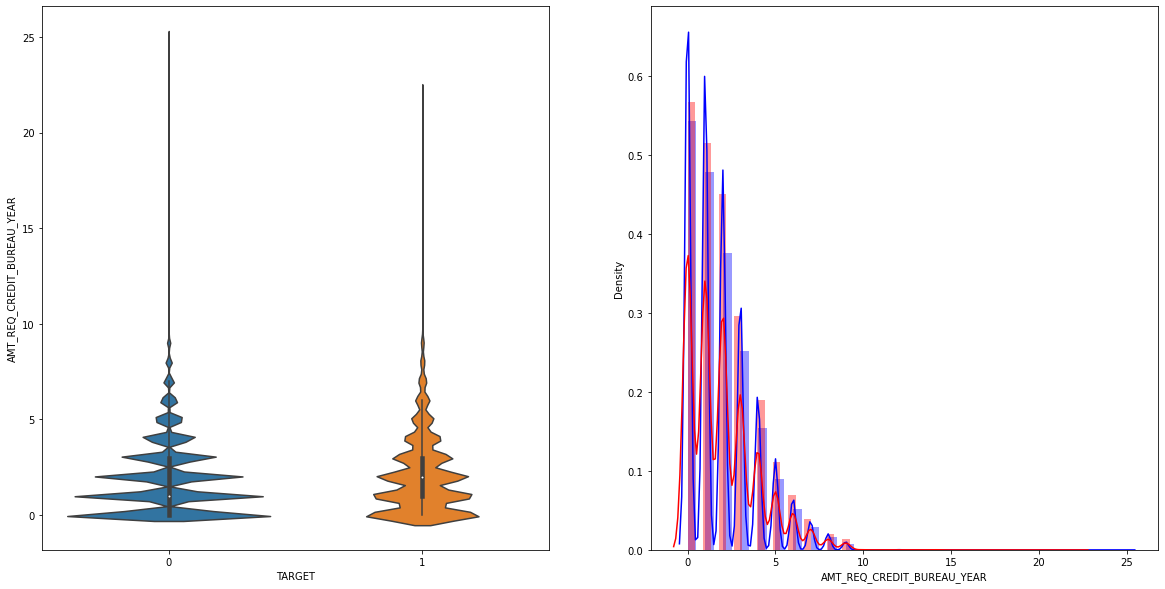

In [ ]:
columns = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
           'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 
           'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

show_num_hist(app_train, columns)

* AMT_INCOME_TOTAL, AMT_CREDIT 은 크게 차이가 없음. 
* AMT_ANNUITY(대출액) 는 대출 상환이 불가능한 사람들인 조건에서 상대적으로 작은 숫자대의 값이 조금 많음.
* AMT_GOOD_PRICE는 크게 차이가 없음. 
* DAYS_BIRTH(고객 나이) 는 대출 상환이 불가능한 사람들인 조건에서 적은 연령대의 숫자값이 상대적으로 많음. 
* DAYS_EMPLOYED(대출 신청 전 직업 유지 기간) 는 대출 상환이 불가능한 사람들인 조건에서 작은 값들이 조금 더 많음. 
* DAYS_ID_PUBLISH (신원 증명 문서 변경전 걸린 기간), DAYS_REGISTRATION (대출 신청 변경 등록 변경전 걸린 기간) 는 대출 상환이 불가능한 사람들인 조건에서 최근 값들이 조금 더 많음. 
* DAYS_LAST_PHONE_CHANGE는 큰 차이 없음. 
* CNT_FAM_MEMBERS는 차이가 없음. outlier 때문에 histogram에 차이가 있어 보임. 
* REGION_RATING_CLIENT는 큰 차이 없음 
* EXT_SOURCE_1,EXT_SOURCE_2, EXT_SOURCE_3 모두 조금씩 차이가 있음.  
* 나머지 컬럼모두 큰 차이가 없음. 
* 전반적으로 연령대가 낮은(직장 경력이 적은), 소액 대출에서 상대적으로 연체 비중이 높음.  
* EXT_SOURCE_1,EXT_SOURCE_2, EXT_SOURCE_3 속성들은 외부 데이터에서 얻어온 점수를 뜻하며 무슨 의미를 갖고있는지 모름.

#### seaborn의 countplot() 또는 catplot()을 이용하여 category 피처(object 컬럼)을 TARGET 유형에 따라 Count 비교

In [ ]:
# 범주형 속성 리스트
object_columns = app_train.dtypes[app_train.dtypes=='object'].index.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

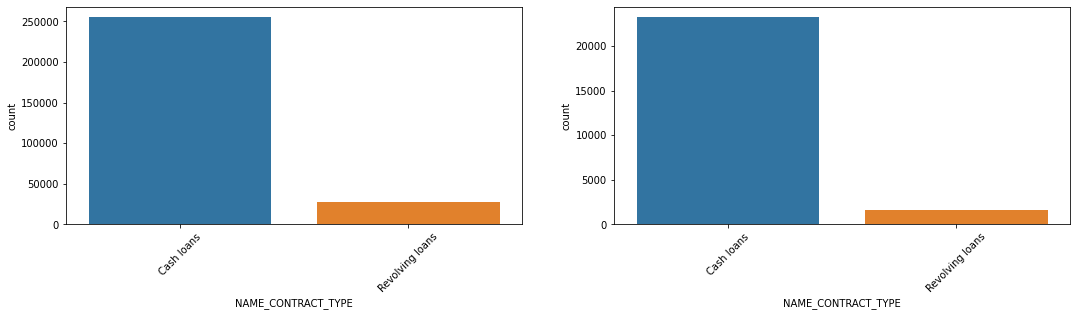

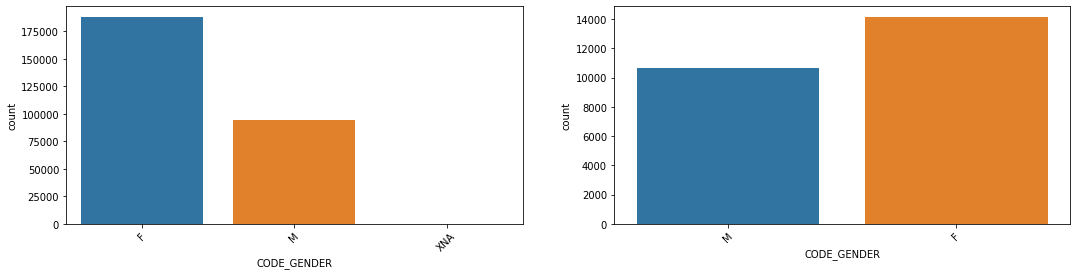

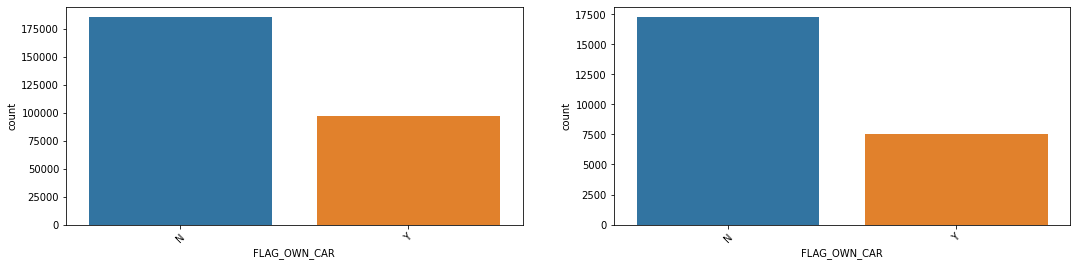

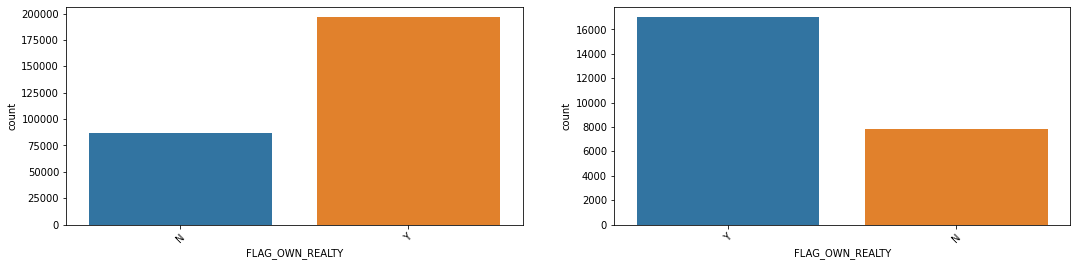

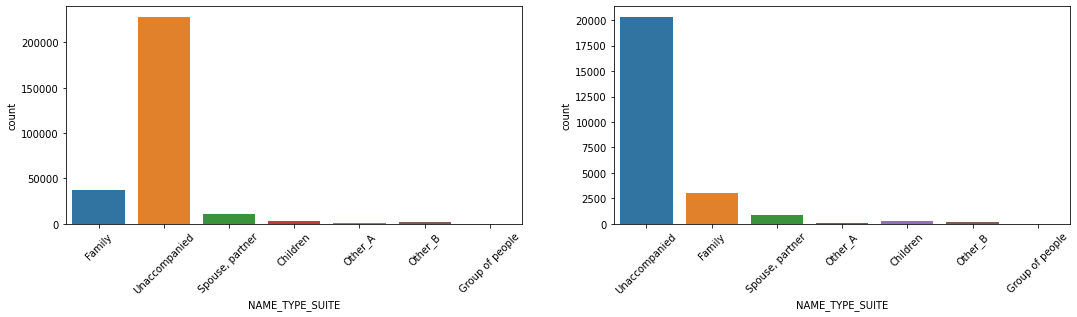

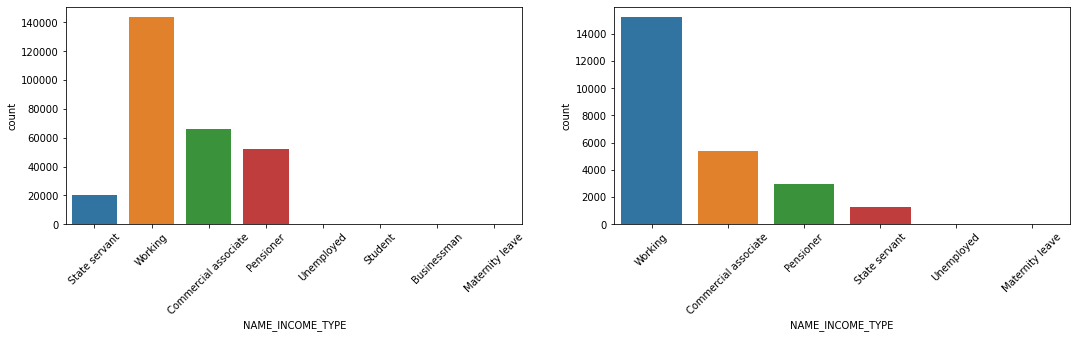

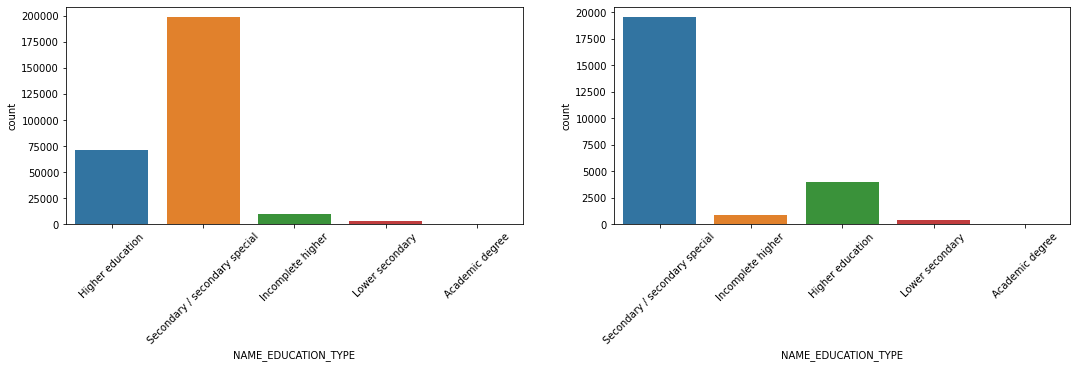

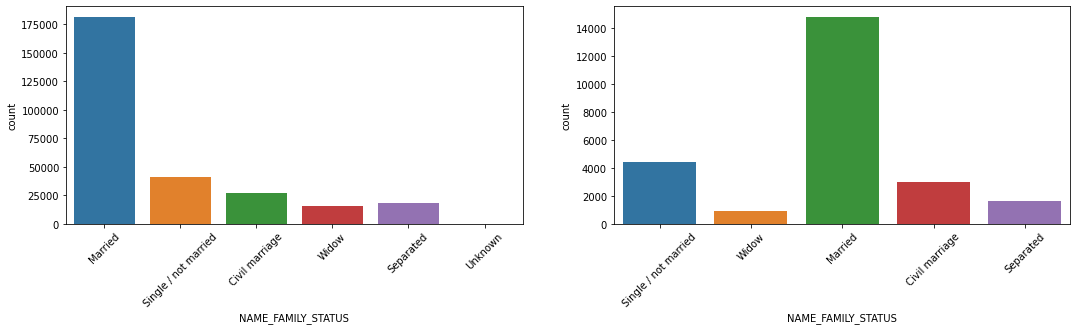

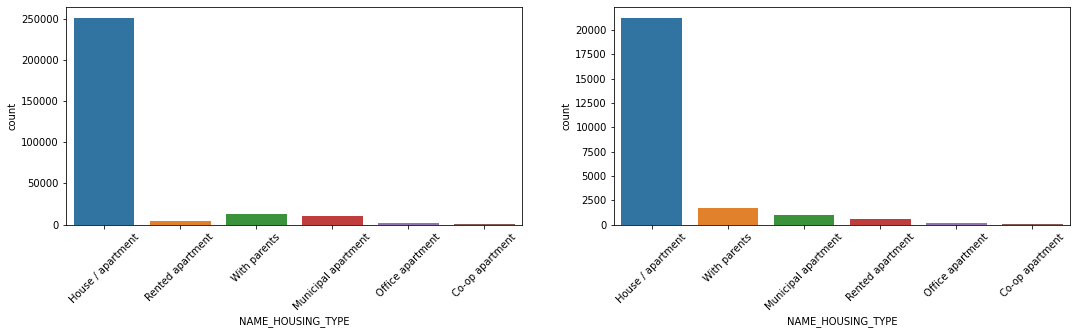

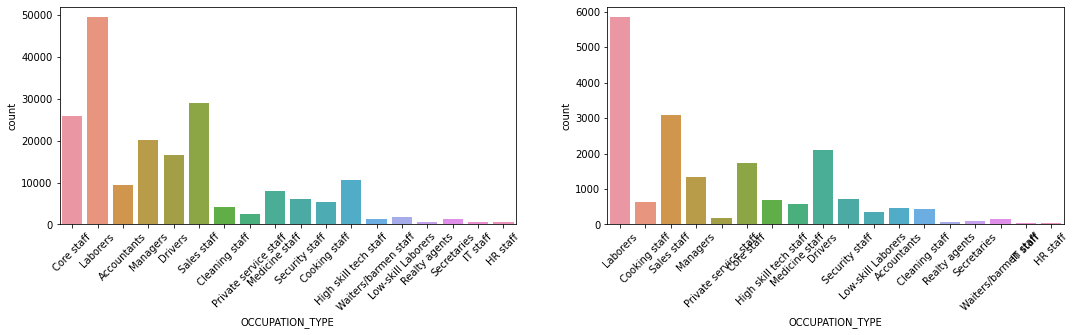

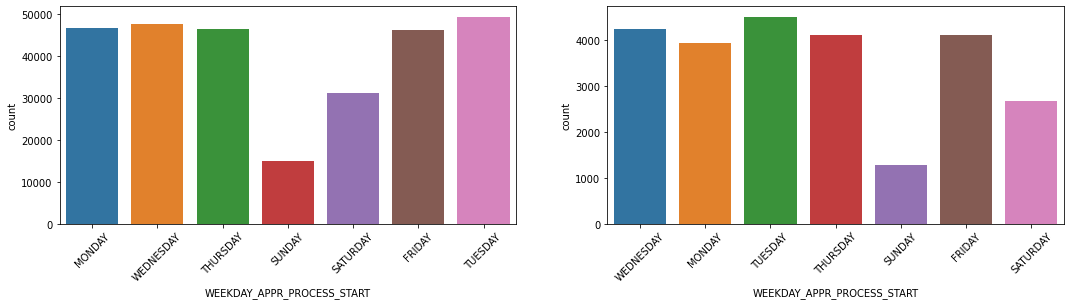

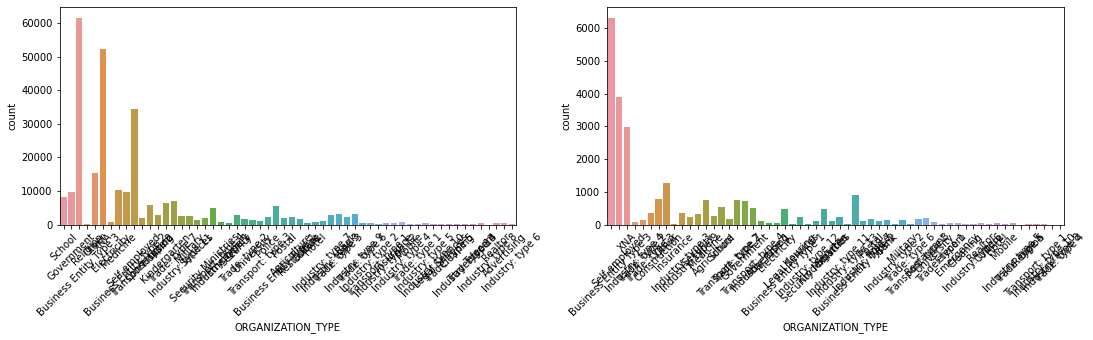

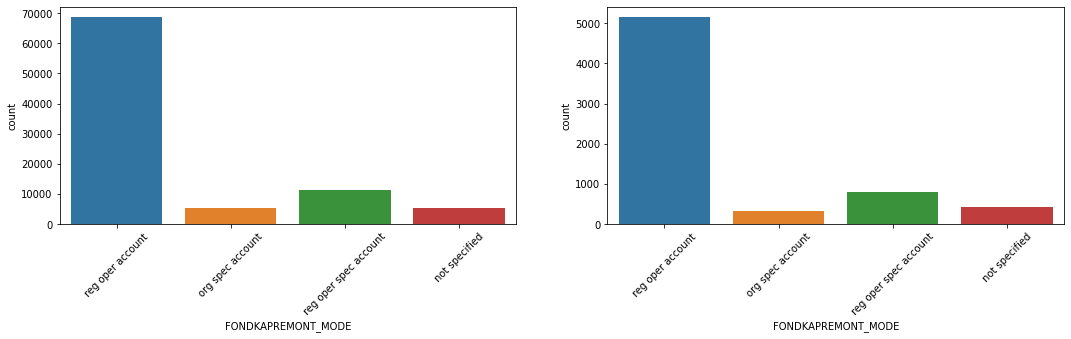

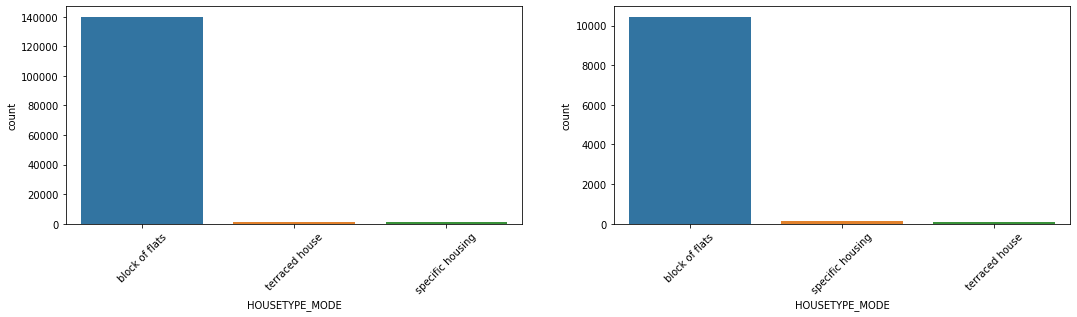

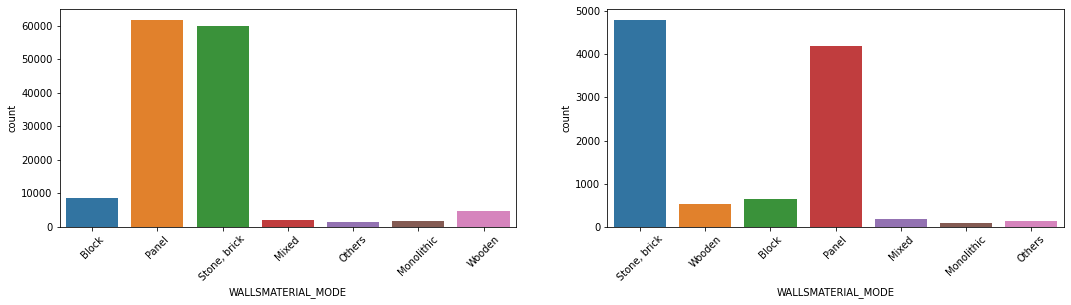

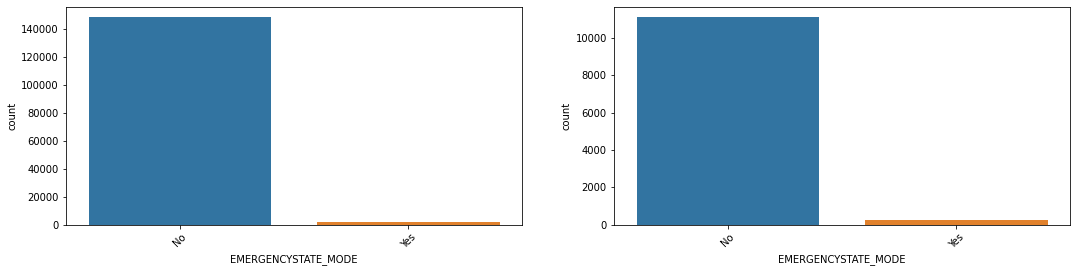

In [ ]:
# countplot을 이용한 범주형속성 별 개수
def show_count(df, columns):
    cond_1 = (df['TARGET'] == 1)
    cond_0 = (df['TARGET'] == 0)
    
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 4), squeeze=False)
        # countplot을 이용하여 category값의 histogram 표현
        chart0 = sns.countplot(df[cond_0][column], ax=axs[0][0])
        # x축의 tick label들이 값 유형이 많으므로 45도로 회전하여 표현
        chart0.set_xticklabels(chart0.get_xticklabels(), rotation=45)
        chart1 = sns.countplot(df[cond_1][column], ax=axs[0][1])
        chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

        
show_count(app_train, object_columns)

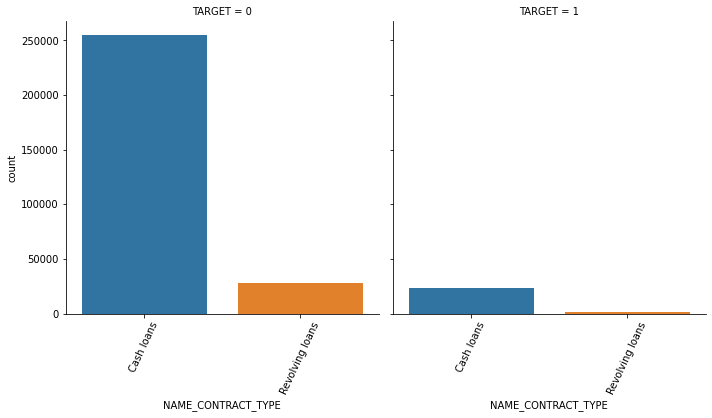

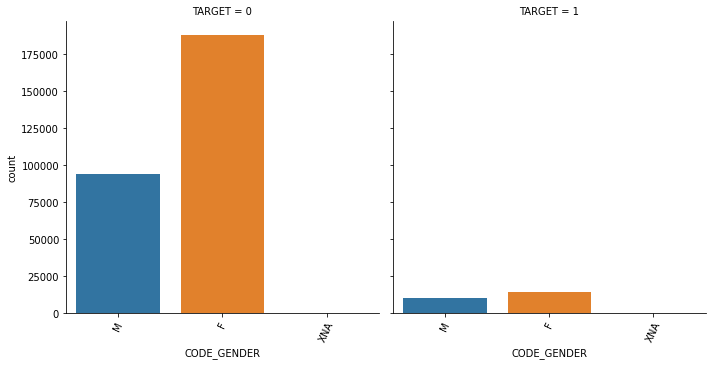

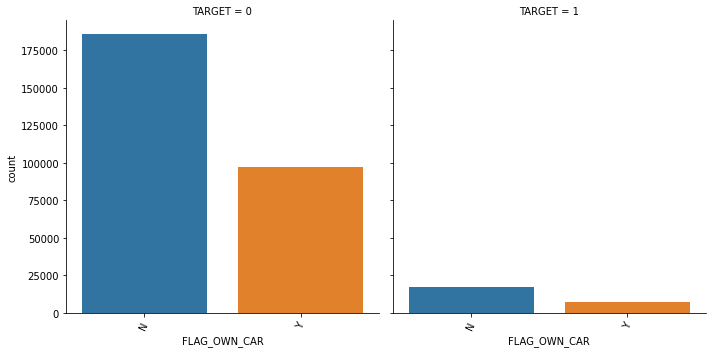

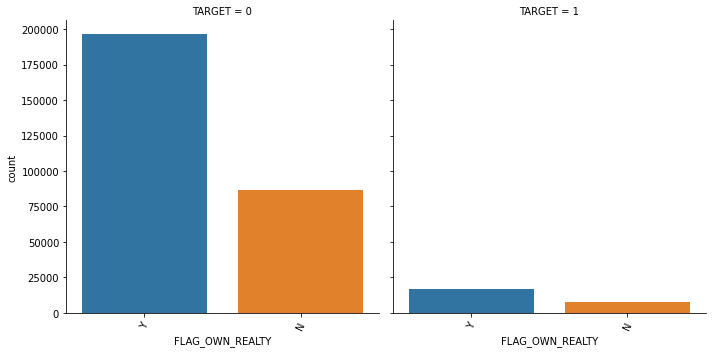

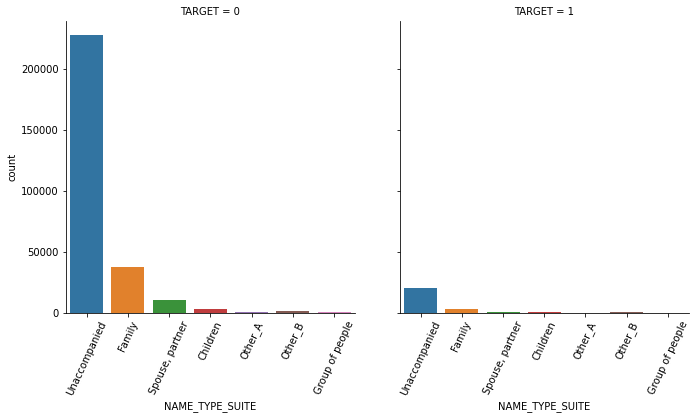

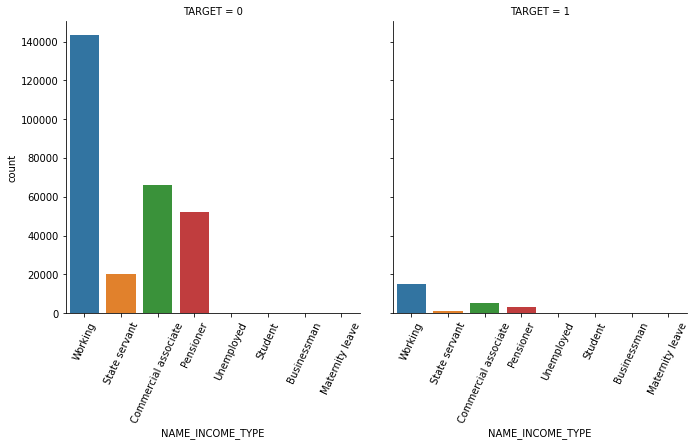

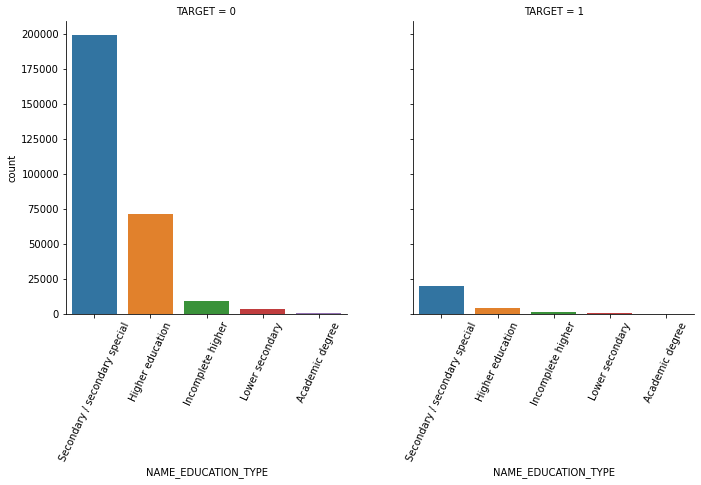

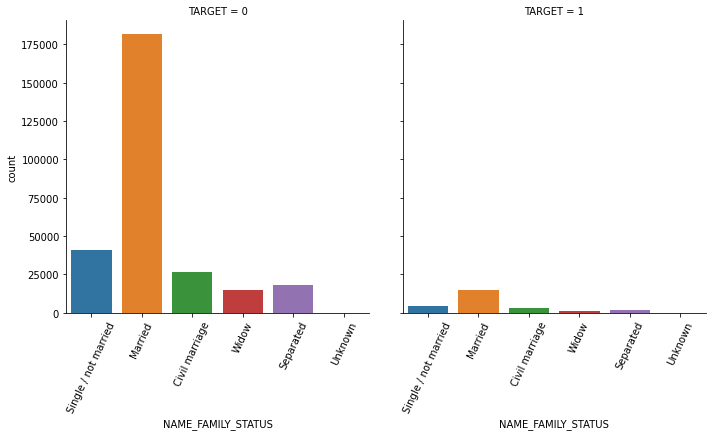

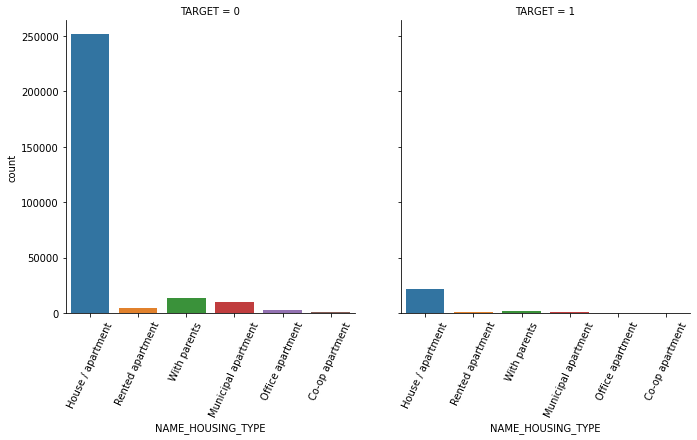

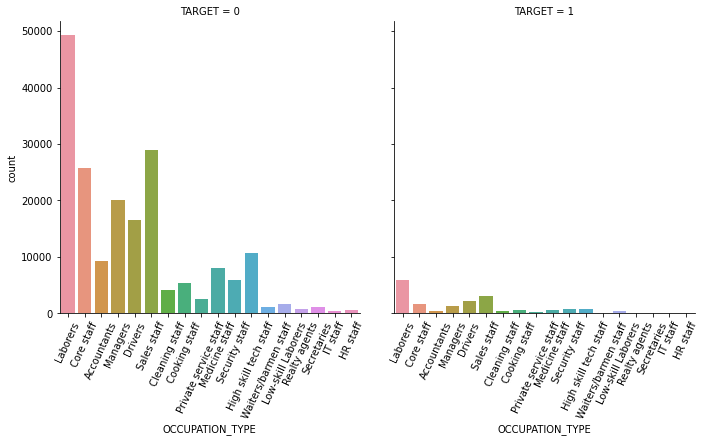

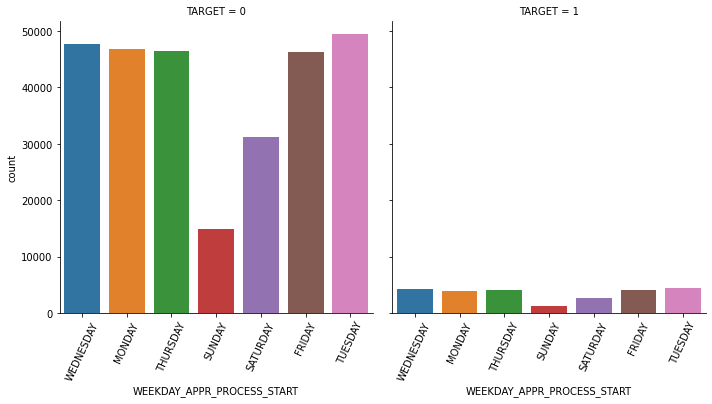

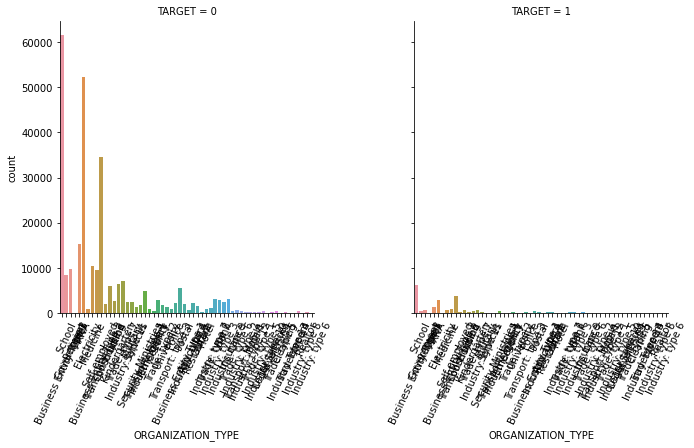

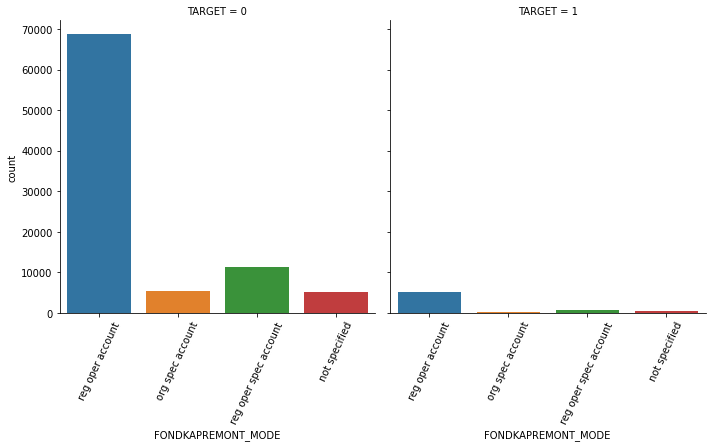

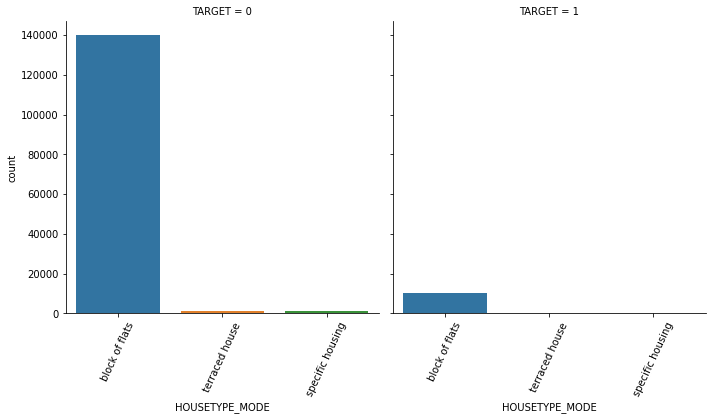

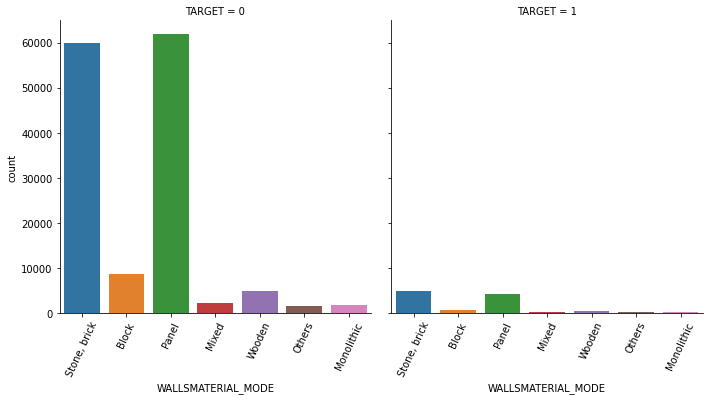

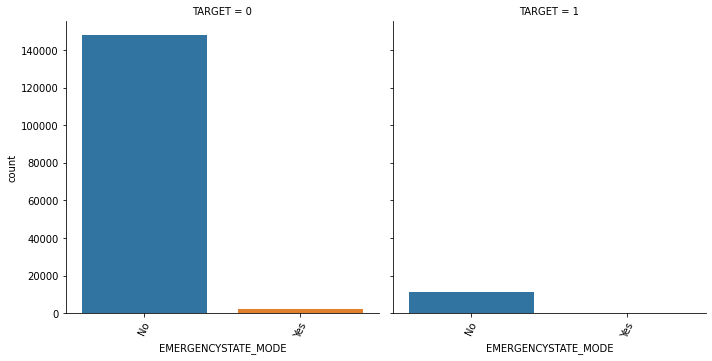

In [ ]:
# catplot을 이용하여 TARGET별로 여러컬럼의 category 값 Histogram을 표현.  
def show_category(df, columns):
    for column in columns:
        chart = sns.catplot(x=column, col="TARGET", data=df, kind="count")
        chart.set_xticklabels(rotation=65)
        
show_category(app_train, object_columns)

#### 대출 횟수 대비 연체 비율이 남성이 여성보다 높음. 이를 value_counts()로 확인 ->  app_train['CODE_GENDER'] 속성이 TARGET 1, 0에서 유의미한 차이를 보임

In [ ]:
cond_1 = (app_train['TARGET'] == 1) # 대출 상활 불가능 조건
cond_0 = (app_train['TARGET'] == 0) # 대출 상환 가능 조건
cond_f = (app_train['CODE_GENDER'] == 'F') # 여자
cond_m = (app_train['CODE_GENDER'] == 'M') # 남자

# 전체 건수 대비 남성과 여성의 비율 확인
print(app_train['CODE_GENDER'].value_counts()/app_train.shape[0])
# TARGET=1 일 경우 남성과 여성의 비율 확인
print(app_train[cond_1]['CODE_GENDER'].value_counts()/app_train[cond_1].shape[0])
# TARGET=0 일 경우 남성과 여성의 비율 확인
print(app_train[cond_0]['CODE_GENDER'].value_counts()/app_train[cond_0].shape[0])

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64
F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64
F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64


#### 주요 컬럼들과 target 속성과의 상관분석

In [ ]:
corr_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
               'DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'TARGET']

corr = app_train[corr_columns].corr()

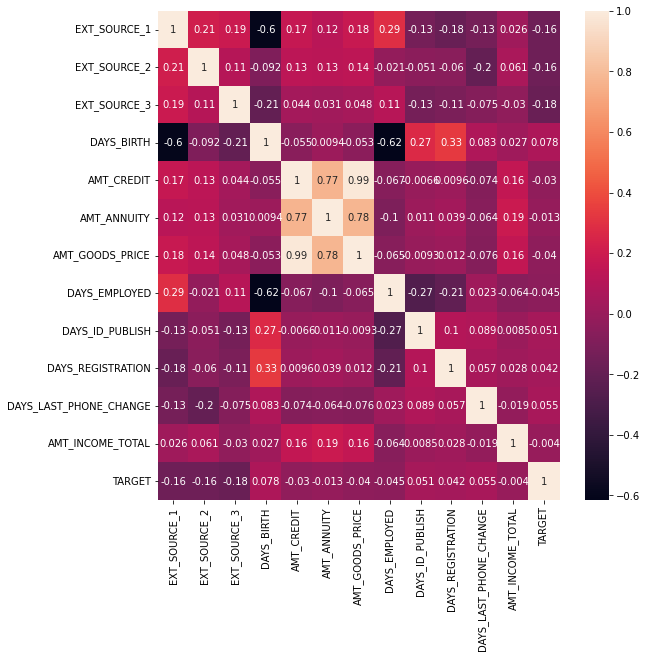

In [ ]:
plt.figure(figsize=(9, 9))
sns.heatmap(corr, annot=True)

# 4. 이상치 파악 및 수정

#### 이상치 데이터 확인 및 DAYS_EMPLOYED 이상치 값 변경 

In [ ]:
### 365243이 매우 많음. 약 1000년치에 해당하는 날짜임... -> 말이 안됨 -> 이상치
app_train['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [ ]:
# CODE_GENDER의 경우 XNA가 4건 정도. 많지 않으므로 그대로 유지 
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
# LightGBM은 NULL값을 트리 모델 생성하는데 사용할 수 있으므로 일괄적으로 Null로 변환 
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace(365243, np.nan) # 아까 본 이상치를 null값으로 변환
app_train['DAYS_EMPLOYED'].value_counts(dropna=False)

 NaN        55374
-200.0        156
-224.0        152
-230.0        151
-199.0        151
            ...  
-13961.0        1
-11827.0        1
-10176.0        1
-9459.0         1
-8694.0         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

# 5. 주요 Feature들에 대한 feature engineering 수행

#### EDA결과 EXT_SOURCE들과 TARGET이 매우 유의미한 결과를 가시적으로 나타내주었음. -> 중요한 속성일듯

#### 하지만 EXT_SOURCE들은 외부 점수 데이터라 정확히 무슨 의미를 지닌지 알 수 없음. -> 단순 시각화만....

In [ ]:
app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [ ]:
# EXT_SOURCE_X 피처들의 평균/최대/최소/표준편차 확인 
print('### mean ###\n', app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean())
print('\n### max ###\n',app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].max())
print('\n### min ###\n',app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].min())
print('\n### std ###\n',app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std())

### mean ###
 EXT_SOURCE_1    0.502130
EXT_SOURCE_2    0.514393
EXT_SOURCE_3    0.510853
dtype: float64

### max ###
 EXT_SOURCE_1    0.962693
EXT_SOURCE_2    0.855000
EXT_SOURCE_3    0.896010
dtype: float64

### min ###
 EXT_SOURCE_1    1.456813e-02
EXT_SOURCE_2    8.173617e-08
EXT_SOURCE_3    5.272652e-04
dtype: float64

### std ###
 EXT_SOURCE_1    0.211062
EXT_SOURCE_2    0.191060
EXT_SOURCE_3    0.194844
dtype: float64


#### 데이터 가공 전 train set와 test set 결합

In [ ]:
apps = pd.concat([app_train, app_test])
print(apps.shape)

(356255, 122)


#### EXT_SOURCE_X FEATURE 가공
* EXT_SOURCE_X 피처들을 결합하여 평균과 표준 편차를 신규 생성. 

In [ ]:
# EXT_SOURCE_X 피처들을 결합하여 평균과 표준 편차를 신규 생성. 
apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)

In [ ]:
apps['APPS_EXT_SOURCE_STD'].isnull().sum()

40950

In [ ]:
# 새로 생성한 APPS_EXT_SOURCE_STD이 NULL일 경우 APPS_EXT_SOURCE_STD의 평균으로 일괄 변경. 
apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
apps['APPS_EXT_SOURCE_STD'].isnull().sum()

0

#### AMT_CREDIT 비율로 Feature 가공

In [ ]:
# AMT_CREDIT(대출 금액)으로 대출과 관련된 금액 추가 가공. 
apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_CREDIT'] # 대출 금액 비율 속성 생성
apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_CREDIT'] # 대출상품액 비율 속성 생성
apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE'] # 대출액과 대출상품액 간 차이 속성 생성

#### AMT_INCOME_TOTAL 비율로 Feature 가공

In [ ]:
# AMT_INCOME_TOTAL 비율로 대출 금액 관련 피처 가공
apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL'] # 월 소득에 비례한 대출 지급액 비율 속성 생성
apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL'] # 총 소득 비율 속성 생성
apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL'] # 소득별 대출상품액 비율 속성 생성
apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['CNT_FAM_MEMBERS'] # 가족수를 고려한 가처분 소득 속성 생성

#### DAYS_BIRTH, DAYS_EMPLOYED 비율로 Feature 가공.

In [ ]:
# DAYS_BIRTH, DAYS_EMPLOYED 비율로 소득/자산 관련 Feature 가공. 
apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH'] # 나이별 직업 유지기간 비율 속성 생성
apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED'] # 직업별 수입 비율 속성 생성
apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH'] # 나이별 총 소득 비율 속성 생성
apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH'] # 나이별 자동차 소유 기간 속성 생성
apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED'] # 직업 유지기간별 자동차 소유 기간 속성 생성

# 6. 모델에 넣을 준비

#### 데이터 레이블 인코딩

In [ ]:
#  pd.factorize()를 사용해서 카테고리 속성들 레이블 인코딩
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()
for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

####  NULL값은 LightGBM 내부에서 처리하도록 특별한 변경하지 않음. 

#### train/test 셋 분리

In [ ]:
apps_train = apps[~apps['TARGET'].isnull()]
apps_test = apps[apps['TARGET'].isnull()]

apps_test = apps_test.drop('TARGET', axis=1)

In [ ]:
print(f'train set shape: {apps_train.shape}    test set shape : {apps_test.shape}') 

train set shape: (307511, 136)    test set shape : (48744, 135)


# 7. 모델링

#### Out Of Fold 방식을 적용하여 LGBM Classifier로 학습 수행. 

### Out Of Fold

Out of fold란 K겹 교차검증을 사용해서 지정해준 kfold개수만큼 각각 다른 검증셋으로 각각 다른 모델을 만들어서 만든 모델 성능들의 평균을 내는 방법

kfold=5 라면 train셋을 5개로 나눠서 첫 1/5부분을 검증셋으로 사용해서 모델링을 하고, 두번째 영역의 1/5만큼 검증셋으로 사용해서 모델링을 하는데, 5개로 쪼갰으므로, 5번 반복할 것임. 만들어진 5개 모델들을 평균하여 성능평가를 함.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

def train_oof(apps_train, apps_test, nfolds=5):
    ftr_app = apps_train.drop(['SK_ID_CURR', 'TARGET'], axis=1) # X data
    target_app = apps_train['TARGET'] # Y data

    # nfolds 개의 cross validatin fold set을 가지는 KFold 생성 
    folds = KFold(n_splits=nfolds, shuffle=True, random_state=2020) 
    
    #  Out of Folds로 학습된 모델의 validation set을 예측하여 결과 확률을 담을 array 생성.
    # validation set가 n_split갯수만큼 있으므로 크기는 ftr_app의 크기가 되어야 함. 
    oof_preds = np.zeros(ftr_app.shape[0])  
    
    # Ouf of Folds로 학습된 모델의 test dataset을 예측하여 결과 확률을 담을 array 생성. 
    test_preds = np.zeros(apps_test.shape[0])
    
    # n_estimators를 4000까지 확대. 
    clf = LGBMClassifier(
                nthread=4,
                n_estimators=4000,
                learning_rate=0.01,
                max_depth = 11,
                num_leaves=58,
                colsample_bytree=0.613,
                subsample=0.708,
                max_bin=407,
                reg_alpha=3.564,
                reg_lambda=4.930,
                min_child_weight= 6,
                min_child_samples=165,
                silent=-1,
                verbose=-1,
                )

    # nfolds 번 cross validation Iteration 반복하면서 OOF 방식으로 학습 및 테스트 데이터 예측
    for fold_idx, (train_idx, valid_idx) in enumerate(folds.split(ftr_app)):
        print('##### iteration ', fold_idx, ' 시작')
        # 학습용 데이터 세트의 인덱스와 검증용 데이터 세트의 인덱스 추출하여 이를 기반으로 학습/검증 데이터 추출
        train_x  = ftr_app.iloc[train_idx, :]
        train_y = target_app.iloc[train_idx]
        valid_x = ftr_app.iloc[valid_idx, :]
        valid_y = target_app.iloc[valid_idx]
        
        # 추출된 학습/검증 데이터 세트로 모델 학습. early_stopping은 200으로 증가. 
        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc', verbose= 200, 
                early_stopping_rounds= 200)
        # 검증 데이터 세트로 예측된 확률 저장. 사용되지는 않음. 
        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]       
        # 학습된 모델로 테스트 데이터 세트에 예측 확률 계산. 
        # nfolds 번 반복 실행하므로 평균 확률을 구하기 위해 개별 수행시 마다 수행 횟수로 나눈 확률을 추후에 더해서 최종 평균 확률 계산. 
        test_preds += clf.predict_proba(apps_test.drop('SK_ID_CURR', axis=1), num_iteration=clf.best_iteration_)[:, 1]/folds.n_splits
        
        
    return clf, test_preds

In [ ]:
clf, test_preds = train_oof(apps_train, apps_test, nfolds=5) # 모델 학습 및 성능 확인

##### iteration  0  시작
Training until validation scores don't improve for 200 rounds.
[200]	training's auc: 0.770593	training's binary_logloss: 0.246069	valid_1's auc: 0.75355	valid_1's binary_logloss: 0.246795
[400]	training's auc: 0.787743	training's binary_logloss: 0.238544	valid_1's auc: 0.761231	valid_1's binary_logloss: 0.242806
[600]	training's auc: 0.801372	training's binary_logloss: 0.233715	valid_1's auc: 0.765278	valid_1's binary_logloss: 0.241367
[800]	training's auc: 0.812693	training's binary_logloss: 0.229825	valid_1's auc: 0.767149	valid_1's binary_logloss: 0.240725
[1000]	training's auc: 0.822416	training's binary_logloss: 0.226439	valid_1's auc: 0.768225	valid_1's binary_logloss: 0.240367
[1200]	training's auc: 0.830801	training's binary_logloss: 0.223463	valid_1's auc: 0.768734	valid_1's binary_logloss: 0.240186
[1400]	training's auc: 0.838647	training's binary_logloss: 0.220651	valid_1's auc: 0.769073	valid_1's binary_logloss: 0.240069
[1600]	training's auc: 0.84594

#### training set 기준 정확도 84%

# 8 모델 사용 및 결과 예측

#### 학습된 Classifier를 이용하여 테스트 데이터 예측

In [ ]:
preds = clf.predict_proba(apps_test.drop(['SK_ID_CURR'], axis=1))[:, 1 ] # 모델 사용 결과로 예측값 확인
app_test['TARGET'] = preds

In [ ]:
preds

array([0.03031702, 0.05612832, 0.01266207, ..., 0.01886566, 0.03862259,
       0.18055556])